# seaborn

箱形图能显示出一组数据的最大值、最小值、中位数、及上下四分位数。

**四分位距**:IQR=Q3-Q1

**上下四分位数**:（Q3和Q1）

**异常值**：小于Q1－1.5IQR或大于Q3+1.5IQR的值

箱形图的优势在于中位数、尾长、异常值等显而易见

利用箱形图处理异常值与3sigma原则对比，3sigma是以标准差和均值为基础，箱形图是以四分位数和四分位距为基础



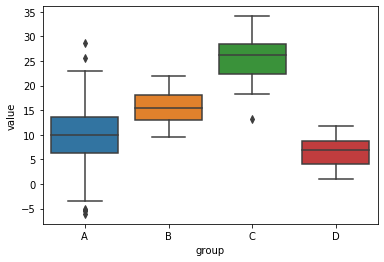

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })


data=a.append(b).append(c).append(d).append(e)

sns.boxplot( x='group',y='value',data=data)

#ax = sns.stripplot(x='group', y='value', data=data, color="orange", jitter=0.2, size=2.5)

箱形图会产生一些信息丢失，如上图所示，我们看不到数据的数量，如b和c。也看不到点的分布。

有几种技术可以相对避免这个问题。

1.分类散点图(stripplot)

2.小提琴图

3.显示观察数量

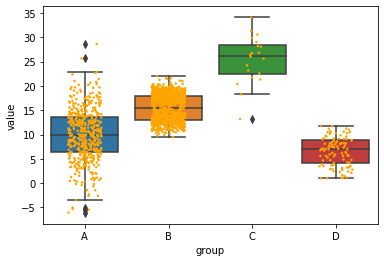

In [25]:
ax = sns.boxplot(x='group', y='value', data=data)
ax = sns.stripplot(x='group', y='value', data=data, color="orange", jitter=0.2, size=2.5)

Text(0.0, 1.0, 'Boxplot with number of observation')

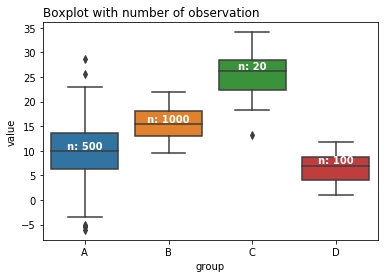

In [29]:
# Start with a basic boxplot
sns.boxplot(x="group", y="value", data=data)
 
# Calculate number of obs per group & median to position labels
medians = data.groupby(['group'])['value'].median().values
nobs = data.groupby("group").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')

plt.title("Boxplot with number of observation", loc="left")


# 利用箱型图清洗异常值

In [24]:
# 代码来源于：https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.6.1cd8593aL08FOW&postId=95501
# 作者公众号：阿泽的学习笔记

In [22]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

# pyecharts

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Boxplot

v1 = [
    [850, 740, 900, 1070, 930, 850, 950, 980, 980, 880, 1000, 980],
    [960, 940, 960, 940, 880, 800, 850, 880, 900, 840, 830, 790],
]
v2 = [
    [890, 810, 810, 820, 800, 770, 760, 740, 750, 760, 910, 920],
    [890, 840, 780, 810, 760, 810, 790, 810, 820, 850, 870, 870],
]
c = Boxplot()
c.add_xaxis(["expr1", "expr2"])
c.add_yaxis("A", c.prepare_data(v1))
c.add_yaxis("B", c.prepare_data(v2))
c.set_global_opts(title_opts=opts.TitleOpts(title="BoxPlot-基本示例"))
c.render("boxplot_base.html")

# reference

1.https://python-graph-gallery.com/39-hidden-data-under-boxplot/

2.https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.6.1cd8593aL08FOW&postId=95501